In [93]:
type Direct end
function müller_rec(::Direct; ϵ::Float64 = 0.0, ϕ::Float64 = 0.0, ΔG::Float64 = 0.0, α::Float64 = 45.0*π/180, ψ::Float64 = 0.0)
    return [1.0         (-2ϵ*sin(ϕ)*sin(2α) + ΔG/2*cos(2α)) 2ϵ*cos(ϕ) (2ϵ*sin(ϕ)*cos(2α) + ΔG/2*sin(2α))
            ΔG/2                     cos(2α)                   0.0                  sin(2α)
            2ϵ*cos(ϕ + ψ)          sin(2α)*sin(ψ)             cos(ψ)            -cos(2α)*sin(ψ)
            2ϵ*sin(ϕ + ψ)         -sin(2α)*cos(ψ)             sin(ψ)             cos(2α)*cos(ψ)]
end


müller_rec (generic function with 3 methods)

In [94]:
type Permuted end
function müller_rec(::Permuted; ϵ::Float64 = 0.0, ϕ::Float64 = 0.0, ΔG::Float64 = 0.0, α::Float64 = 45.0*π/180, ψ::Float64 = 0.0)
    return [1.0         (-2ϵ*sin(ϕ)*sin(2α) + ΔG/2*cos(2α)) 2ϵ*cos(ϕ) (2ϵ*sin(ϕ)*cos(2α) + ΔG/2*sin(2α))
            -2ϵ*sin(ϕ + ψ)         sin(2α)*cos(ψ)             -sin(ψ)             -cos(2α)*cos(ψ)
            2ϵ*cos(ϕ + ψ)          sin(2α)*sin(ψ)             cos(ψ)            -cos(2α)*sin(ψ)
            ΔG/2                     cos(2α)                   0.0                  sin(2α)]
end

müller_rec (generic function with 3 methods)

In [95]:
ΔG = -0.088; ψ = deg2rad(0.0); α = deg2rad(-48.3); ϵ = 0.004; ϕ = deg2rad(96.1);

In [96]:
müller_rec(Direct(); ϵ = ϵ, ϕ = ϕ, ΔG = ΔG, α = α, ψ = ψ)

4x4 Array{Float64,2}:
  1.0           0.0129592  -0.000850113   0.0427941
 -0.044        -0.114937    0.0          -0.993373 
 -0.000850113  -0.0         1.0           0.0      
  0.0079547     0.993373    0.0          -0.114937 

In [97]:
müller_rec(Permuted(), ϵ = ϵ, ϕ = ϕ, ΔG = ΔG, α = α, ψ = ψ)

4x4 Array{Float64,2}:
  1.0           0.0129592  -0.000850113   0.0427941
 -0.0079547    -0.993373   -0.0           0.114937 
 -0.000850113  -0.0         1.0           0.0      
 -0.044        -0.114937    0.0          -0.993373 

Comparing with the native circular case in Heiles's slides:

![Heiles matrix](circ_mueller_heiles.png)

it can be seen that the direct form matches with the example.


# Reproducing the plot

In [98]:
function müller_sky(PAaz::Float64)
    cpa = cos(2*PAaz)
    spa = sin(2*PAaz)
    return [1.0   0.0   0.0  0.0
            0.0   cpa   spa  0.0
            0.0  -spa   cpa  0.0
            0.0   0.0   0.0  1.0]
end

müller_sky (generic function with 1 method)

In [99]:
function lin_pol_source(;flux::Float64 = 1.0, p::Float64 = 0.1, pa::Float64 = 0.0)
    return Float64[flux
                   p*flux*cos(2*pa)
                   p*flux*sin(2*pa)
                   0.0]
end

lin_pol_source (generic function with 1 method)

In [100]:
PArange = -90:1.0:90

-90.0:1.0:90.0

$Q_{src} = -0.02$

$U_{src} = 0.104$

$p_{src} = 0.104$

$PA_{src} = 45.5^\circ$


In [101]:
I_src = sqrt(-0.002^2 + 0.104^2)/0.104

0.9998150716581506

In [102]:
σ = 0.001

0.001

In [103]:
stokes = Float64[(müller_rec(Direct(); ϵ = ϵ, ϕ = ϕ, ΔG = ΔG, α = α, ψ = ψ)*
                  müller_sky(deg2rad(PAaz))*
                  lin_pol_source(flux = I_src, pa = deg2rad(45.5), p = 0.104))[i] + σ*randn()
                   for PAaz = PArange, i in 1:4];

In this case ($\alpha \sim 45^\circ$), the output vectors are permuted to (I,V,U,-Q).

In [104]:
I = stokes[:,1]; Q = -stokes[:,4]; U = stokes[:,3]; V = stokes[:,2];

In [105]:
using Plots; pyplot()

Plots.PyPlotBackend()


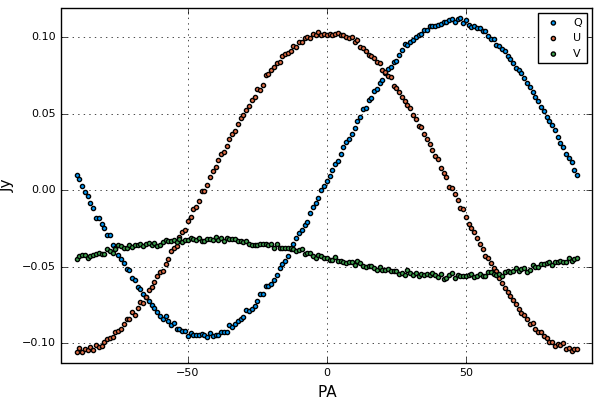

In [106]:
scatter(PArange, -Q, label = "Q", msize = 3, ylabel = "Jy", xlabel = "PA"); 
scatter!(PArange, U, label = "U", msize = 3); 
scatter!(PArange, V, label = "V", msize = 3)

Seems to work, note -Q though.